**Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib**

**Instructions:**

- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

**Resources:**

- Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv 

**Procedures:**

- 9.1 Introduction to Matplotlib - GitHub Link: https://github.com/de-fernandez/CPE-311-CPE22S3/tree/638e7aade0f66e245fc4a4db8384ad9e02fae8fc/Don%20Eleazar%20T.%20Fernandez%2C%20CPE22S3%2C%20CPE%20311%20(HOA%209.1)/9.1%20Introduction%20to%20Matplotlib
- 9.2 Plotting with Pandas - GitHub Link: https://github.com/de-fernandez/CPE-311-CPE22S3/tree/638e7aade0f66e245fc4a4db8384ad9e02fae8fc/Don%20Eleazar%20T.%20Fernandez%2C%20CPE22S3%2C%20CPE%20311%20(HOA%209.1)/9.2%20Plotting%20with%20Pandas
- 9.3 Pandas Plotting Subpackage - GitHub Link: https://github.com/de-fernandez/CPE-311-CPE22S3/tree/638e7aade0f66e245fc4a4db8384ad9e02fae8fc/Don%20Eleazar%20T.%20Fernandez%2C%20CPE22S3%2C%20CPE%20311%20(HOA%209.1)/9.3%20Pandas%20Plotting%20Subpackage

**Data Analysis:**

- Provide comments on output from the procedures above.

- 9.1 Introduction to Matplotlib - The output of the activities came to be with the functionalities that were introduced in this module; such as ".plot(kind = ...)" to create a chart, ".subplot()" to create simultaneous chart, and ".savefig()" to save the created chart.

- 9.2 Plotting with Pandas - The method shown in this module was to display different charts in one go through different parameters, such as "stack = True". With this, the comparison of data is much easier.

- 9.3 Pandas Plotting Subpackage - The method shown in this module was to provide certainty with the data that we are in charge with, such as autocorrection and bootstrap_plot. The "autocorrection" is to check if the data is true as it can be or it is just a noise, and the "bootstrap_plot" is to check the uncertainty of the summary of statistics.

**Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:
1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.
3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.
4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.
5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
- The second subplot will be a bar plot showing the net effect this had monthly, using resample().
- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [8]:
import pandas as pd

In [9]:
fb = pd.read_csv("fb_stock_prices_2018.csv")
fb = pd.DataFrame(fb)
fb.head()

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [10]:
# Change the data type of "date" and set it as index
fb["date"] = pd.to_datetime(fb["date"])
fb = fb.set_index("date")

<Axes: xlabel='date'>

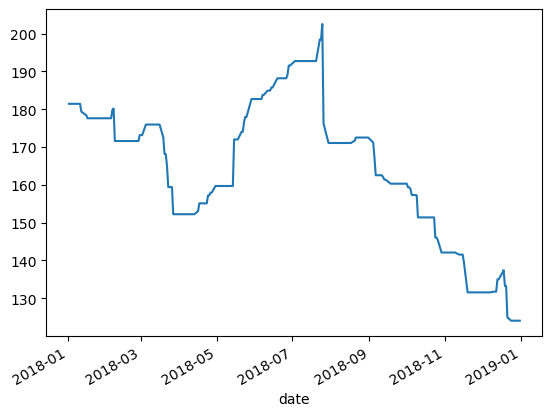

In [11]:
# The rolling 20 day
fb_1 = fb["close"].rolling("20D").min()
fb_1 = fb_1.plot()
fb_1

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

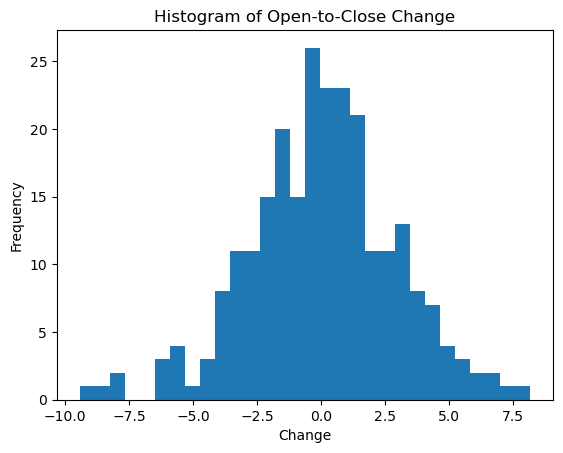

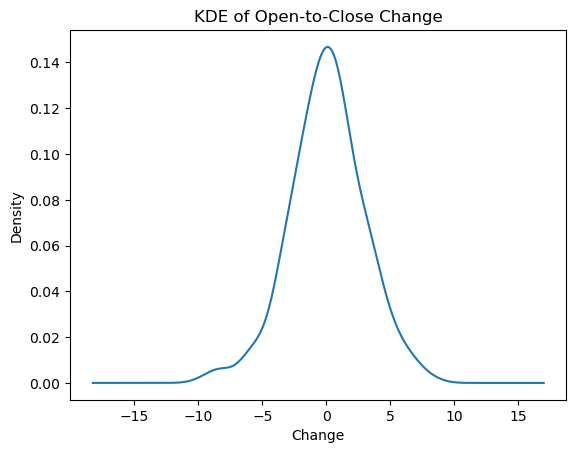

In [13]:
import matplotlib.pyplot as plt

# Find change through the difference of close and open, and drop all the n/a entries
fb["change"] = fb["close"] - fb["open"]
fb_2 = fb["change"].dropna()

# The histogram
fb_2.plot(kind = "hist", bins = 30, title = "Histogram of Open-to-Close Change")
plt.xlabel("Change")
plt.show()

# The KDE
fb_2.plot(kind = "kde", title = "KDE of Open-to-Close Change")
plt.xlabel("Change")
plt.show()

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [15]:
earthquake = pd.read_csv("earthquakes-1.csv")
earthquake = pd.DataFrame(earthquake)
earthquake.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


C:\Users\Eleazar\AppData\Local\Temp\ipykernel_18716\3873269214.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(earthquake_3, labels = earthquake_3.index)


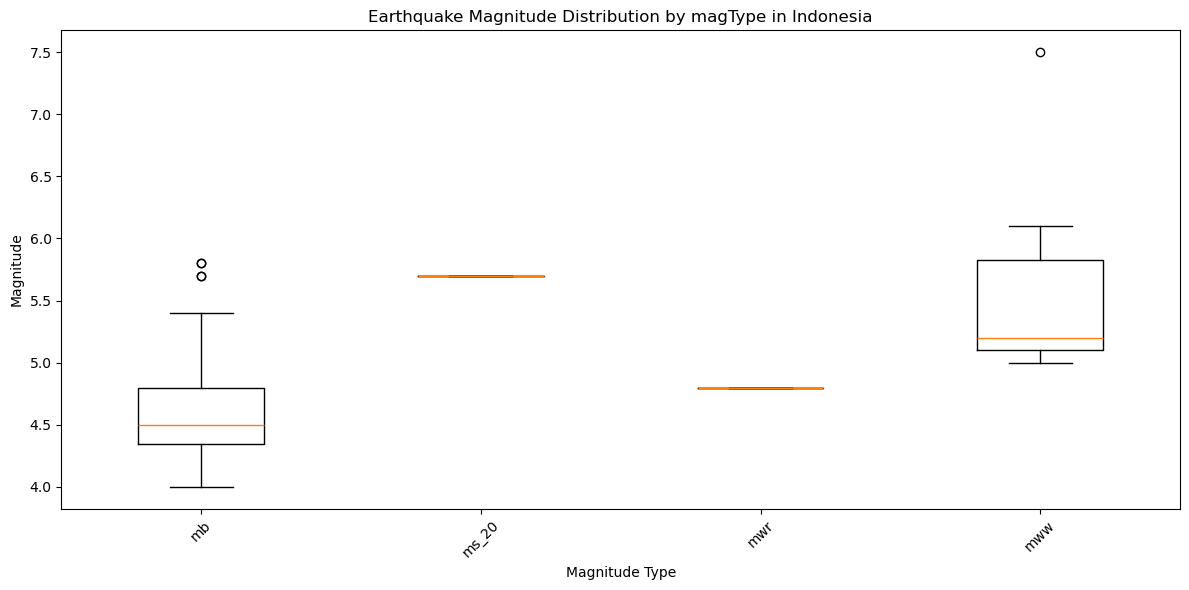

In [16]:
# To select Indonesia and drop the the n/a entries in mag and magType
earthquake_indonedia = earthquake[(earthquake["parsed_place"] == "Indonesia")]
earthquake_indonedia = earthquake_indonedia.dropna(subset = ["mag", "magType"])
earthquake_3 = earthquake_indonedia.groupby("magType")["mag"].apply(list)

# To plot
plt.figure(figsize = (12, 6))
plt.boxplot(earthquake_3, labels = earthquake_3.index)
plt.title("Earthquake Magnitude Distribution by magType in Indonesia")
plt.xlabel("Magnitude Type")
plt.ylabel("Magnitude")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

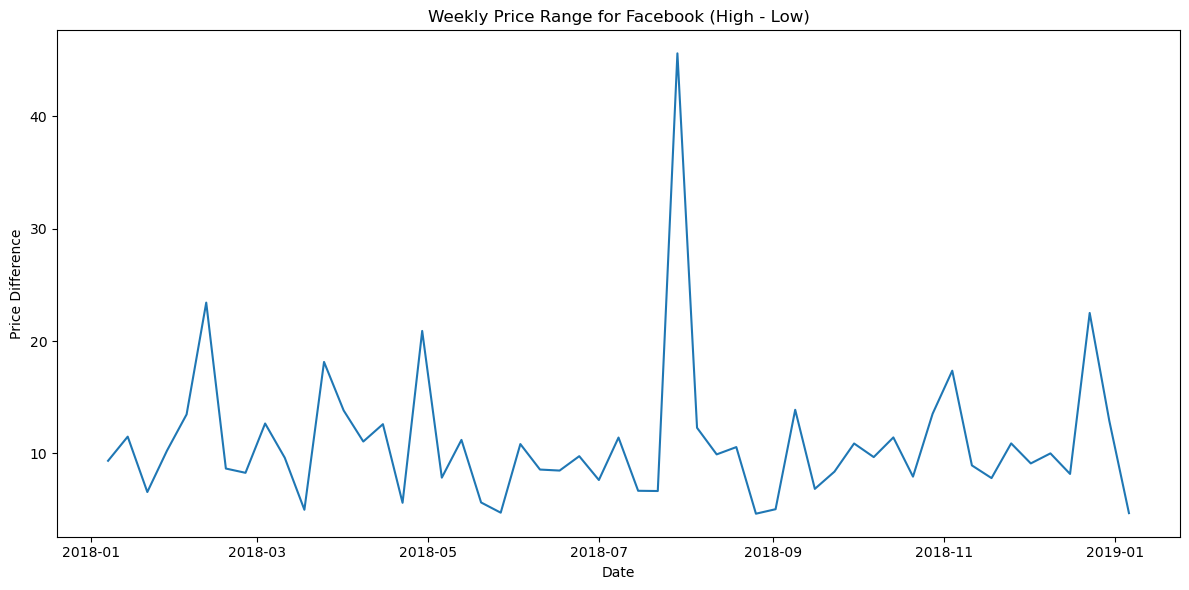

In [18]:
# The difference between the weekly maximum high price and the weekly minimum low price for Facebook
fb_weekly_high = fb["high"].resample("W").max()
fb_weekly_low = fb["low"].resample("W").min()
fb_4 = fb_weekly_high - fb_weekly_low

# To plot
plt.figure(figsize = (12, 6))
plt.plot(fb_4)
plt.title("Weekly Price Range for Facebook (High - Low)")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.tight_layout()
plt.show()

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

- The second subplot will be a bar plot showing the net effect this had monthly, using resample().

- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

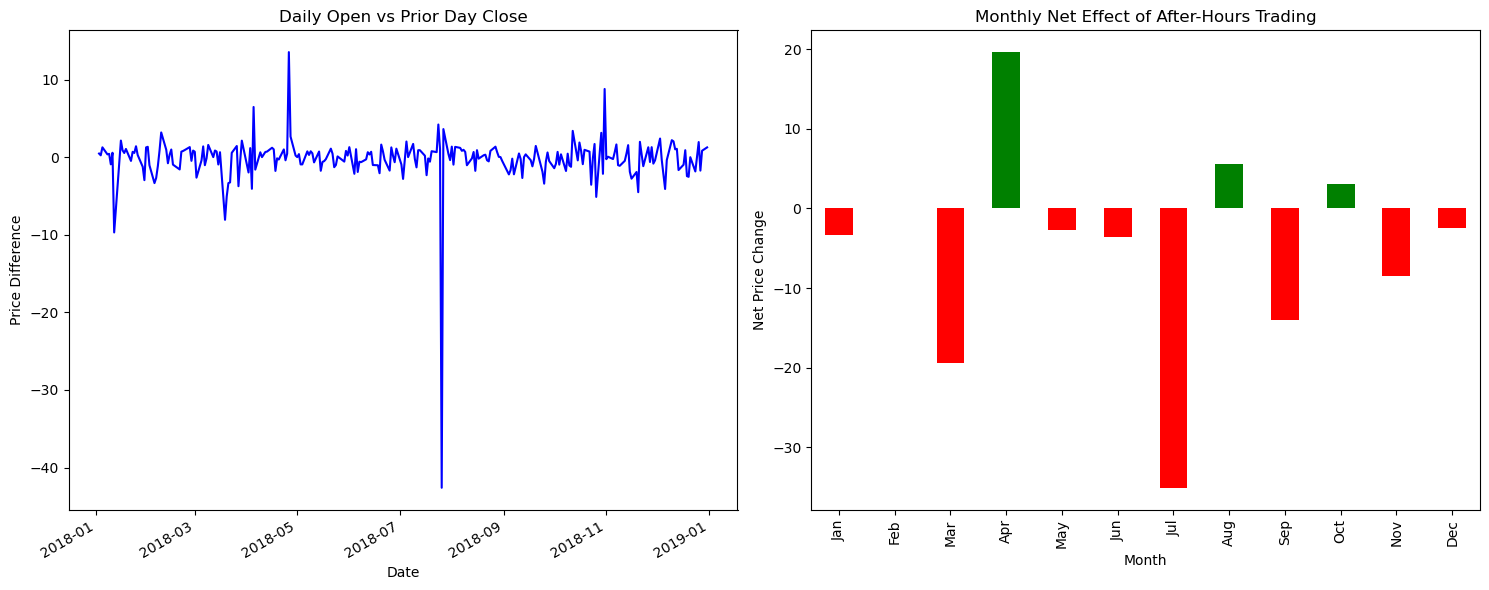

In [20]:
# The daily difference between that day's opening price and the prior day's closing price
fb["Prior_Day_Close"] = fb["close"].shift(1)
fb["After_Hours_Change"] = fb["open"] - fb["Prior_Day_Close"]

# The net effect in monthly period
Monthly_Net = fb["After_Hours_Change"].resample("ME").sum()

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
fb["After_Hours_Change"].plot(color = "blue")
plt.title("Daily Open vs Prior Day Close")
plt.xlabel("Date")
plt.ylabel("Price Difference")

# Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
colors = ["green" if val > 0 else "red" for val in Monthly_Net]
plt.subplot(1, 2, 2)
Monthly_Net.plot(kind = "bar", color = colors)
plt.title("Monthly Net Effect of After-Hours Trading")
plt.xlabel("Month")
plt.ylabel("Net Price Change")

# Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.
plt.xticks(ticks = range(len(Monthly_Net.index)), labels = Monthly_Net.index.strftime("%b"))

plt.tight_layout()
plt.show()

**Summary/Conclusion:**

- Provide a summary of your learnings and the conclusion for this activity.

To conclude, the laboratory activity helped me to understand the functionalities of some function, such as ".resample()" to which it filters the data to a specific time period "daily" and "monthly". I have also learned that some charts can not be plotted in some functionalities, such as boxplot in ".plot(kind = ...)". The laboratory overall had taught me to display data in accordance to the cleaned data in different charts